# Introduction:


This project analyzes a dataset in an attempt to determine what causes the good employees to leave their current jobs. The first step is to clean the data (Part I) and visualize it (Part II) using various types of graphs and charts to help establish clear relationships between various features. Part III analyzes the dataset using various Machine Learning algorithms and picks the best algorithm to model this dataset based on various metrics. Lastly, a conclusion on the entire analysis is provided.

# Part I

# Data Cleaning



This initial stage of the project is to clean the data in such a way that all the important attributes of the dataset be retained and unhindered for analysis purposes. Hence, the initial cleaning phase of the project imports the dataset and the libraries needed for the cleaning stages of the project. A check for Null Values/Missing Values is conducted (none are present). The multiple categorical variables in the dataset are created into dummy variables which is necessary for later stages of the analysis. These new variables are afterwards added to the original dataset and the initial variables from which dummification was done are removed to avoid redundancy. Lastly, the dataset is normalized due to the need to apply machine learning algorithms to it in later stages of the project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
HR = pd.read_csv('HR_comma_sep.csv')
HR.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
HR[HR['satisfaction_level'] == np.nan]
HR[HR['last_evaluation'] == np.nan]
HR[HR['number_project'] == np.nan]
HR[HR['average_montly_hours'] == np.nan]
HR[HR['time_spend_company'] == np.nan]
HR[HR['Work_accident'] == np.nan]
HR[HR['left'] == np.nan]
HR[HR['sales'] == np.nan]
HR[HR['salary'] == np.nan]



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


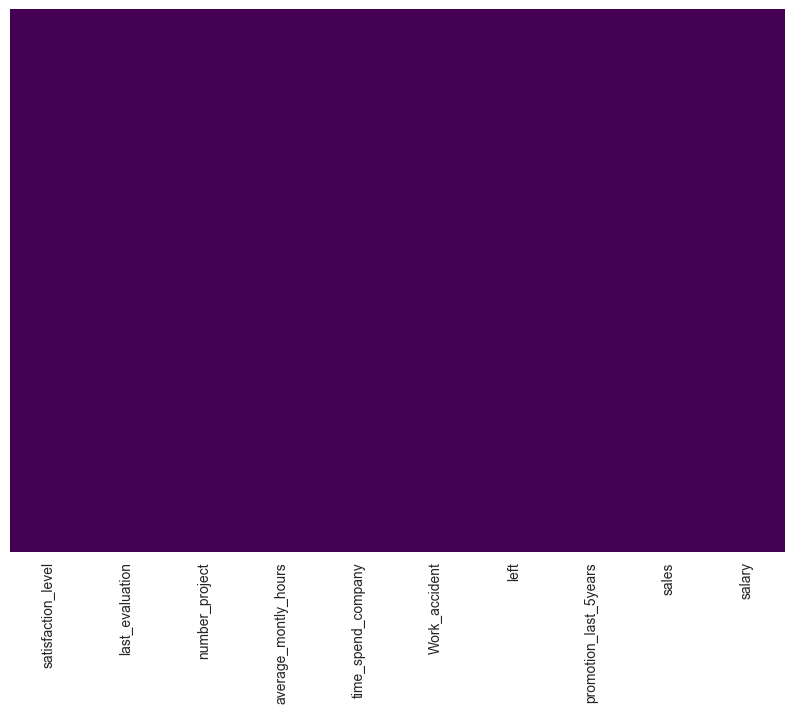

In [4]:
# Create a heatmap, to check for null values.

plt.figure(figsize=(10,7))
sns.heatmap(HR.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [5]:
HR['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [6]:
HR['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [7]:
HR['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
# Create dummy variables for all the departments

sales = pd.get_dummies(HR.sales)

sales.columns = ["IT", "RandD", "accounting", "hr", "management", "marketing", "product_mng", "sales_department", "support", "technical"]

sales.head()




,IT,RandD,accounting,hr,management,marketing,product_mng,sales_department,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [9]:
# Create dummy variables for the salary

salary = pd.get_dummies(HR.salary)

salary.columns = ['low', 'medium', 'high']

salary.head()

,low,medium,high
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [10]:
# Create dummy variable for stayed/left

left = pd.get_dummies(HR.left)

left.columns = ['left', 'stayed']

left.head(10)

,left,stayed
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [11]:
# Concatenate the original dataset with the newly created salary and sales dummified variables

HR = pd.concat([HR, salary, sales], axis = 1)

HR.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales_department,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


In [12]:
HR.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
low                        uint8
medium                     uint8
high                       uint8
IT                         uint8
RandD                      uint8
accounting                 uint8
hr                         uint8
management                 uint8
marketing                  uint8
product_mng                uint8
sales_department           uint8
support                    uint8
technical                  uint8
dtype: object

In [13]:
# Create a new column 

salary_map = {'low': 1, 'medium': 2, 'high': 3}

HR['salary_variable'] = HR['salary'].apply(lambda x: salary_map[x])

HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,RandD,accounting,hr,management,marketing,product_mng,sales_department,support,technical,salary_variable
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,1,0,0,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,1,0,0,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,1,0,0,1


In [14]:
del HR['salary']

del HR['sales']

In [15]:
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium,...,RandD,accounting,hr,management,marketing,product_mng,sales_department,support,technical,salary_variable
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [16]:
HR.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
low                        uint8
medium                     uint8
high                       uint8
IT                         uint8
RandD                      uint8
accounting                 uint8
hr                         uint8
management                 uint8
marketing                  uint8
product_mng                uint8
sales_department           uint8
support                    uint8
technical                  uint8
salary_variable            int64
dtype: object

In [17]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(HR.astype(float))
X_scaled = pd.DataFrame(X_scaled, columns = HR.columns)

# Min Max Scaler

X_scaled.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium,...,RandD,accounting,hr,management,marketing,product_mng,sales_department,support,technical,salary_variable
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.351648,0.218750,0.0,0.266355,0.125,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.010989,0.640625,0.8,0.705607,0.250,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.912088,0.765625,0.6,0.761682,0.375,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.879121,1.000000,0.6,0.598131,0.375,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.362637,0.265625,0.0,0.214953,0.125,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Part II

# Exploratory Data Analysis (EDA)

In this section, we try to visualize the data on employees using various plots, graphs, charts in order to get an idea of how different features in the dataset relate to each other.

The below represents a heatmap of correlations of features. Some interesting observations from this heatmap: Quiet intuitively, you can see that the relationship between satisfaction level and people that left the company is negative. It's also interesting to note that there is a positive correlation between the number of hours employees work and their evaluation. These and other relationships will be explored more deeply in the rest of the EDA.

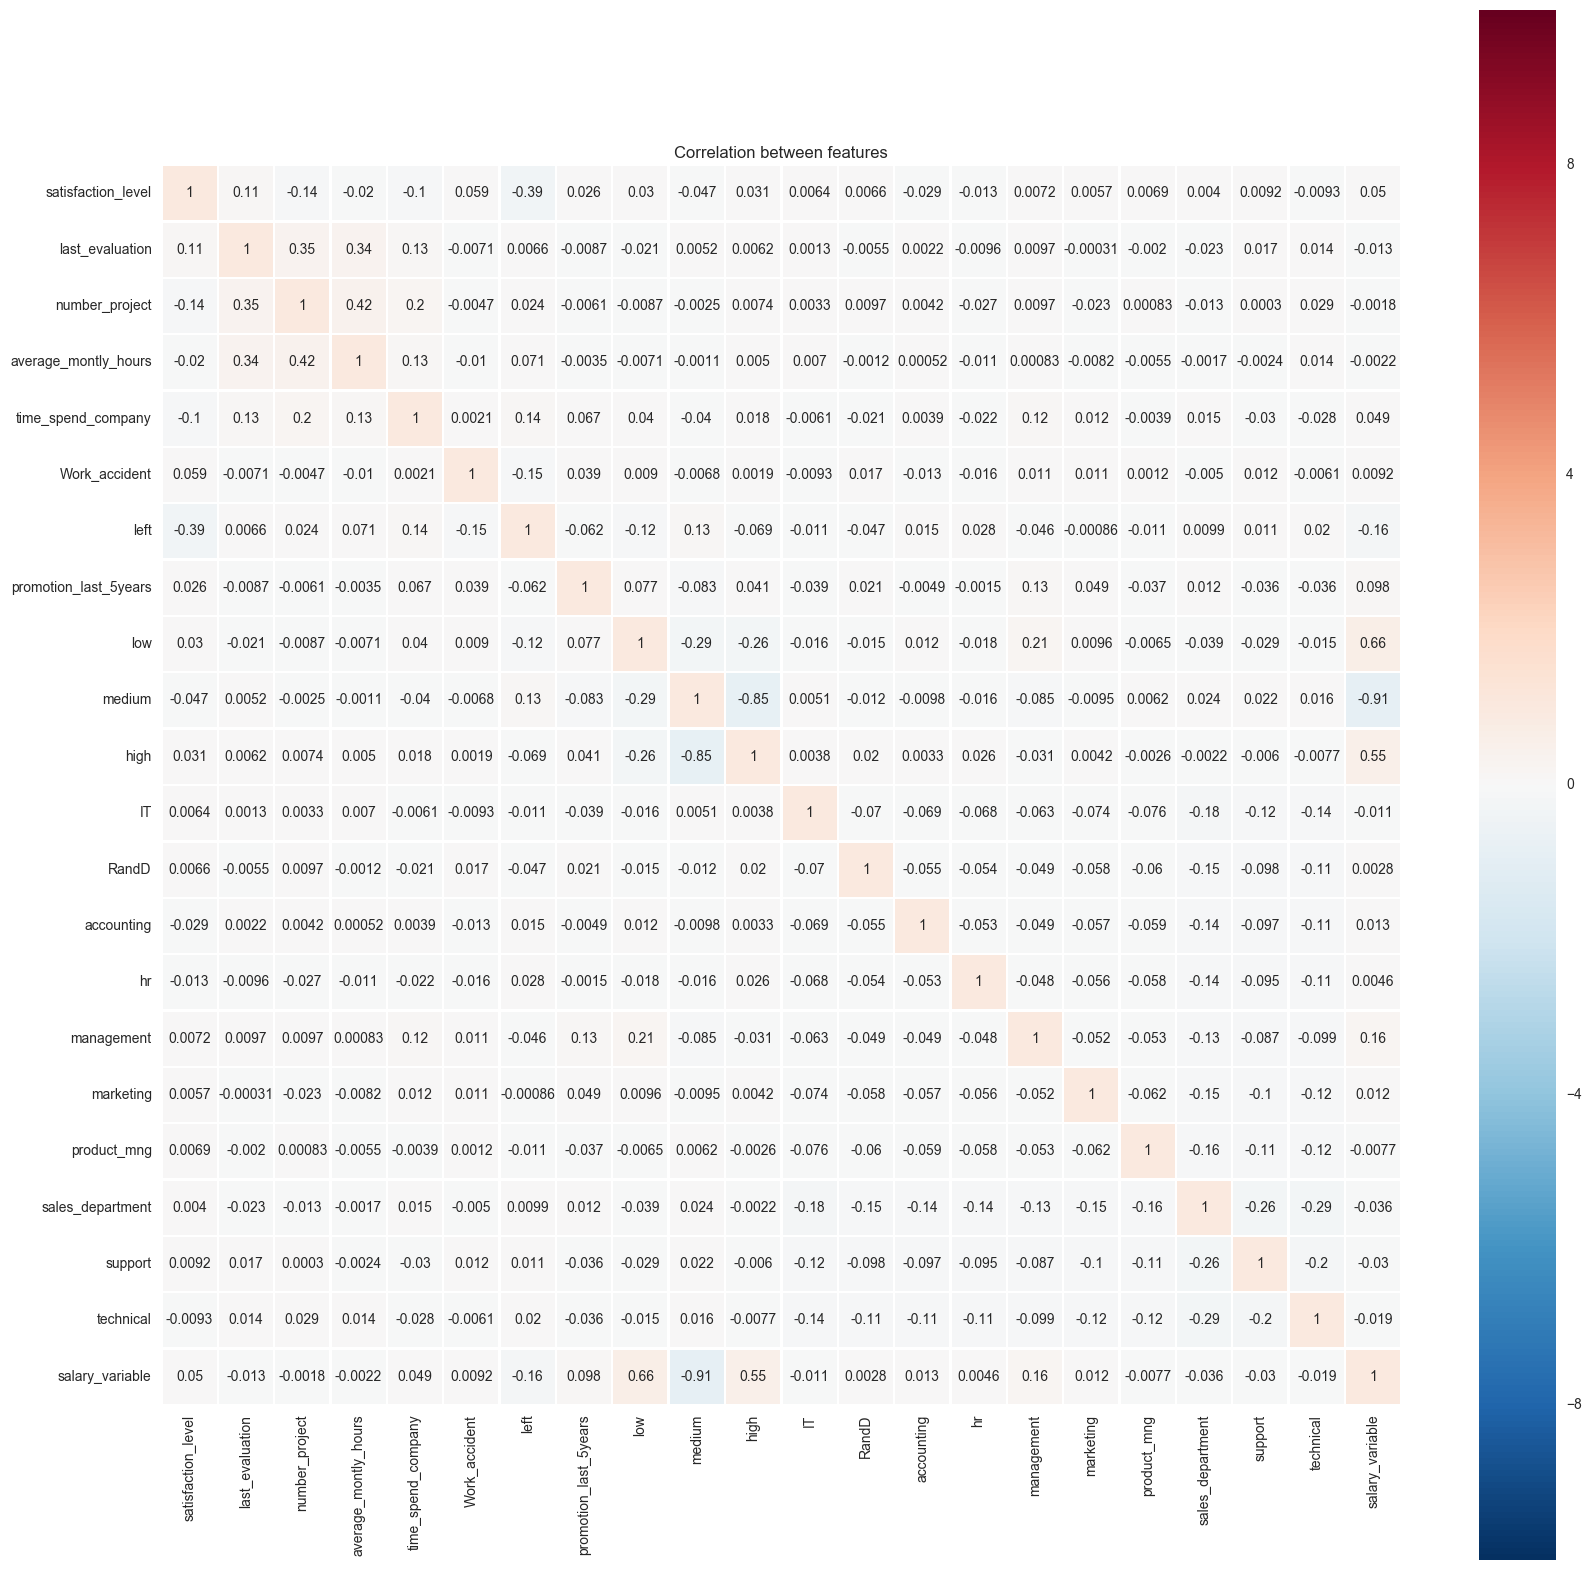

In [18]:
correlation = X_scaled.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=10, square=True,annot=True,cmap=None, linewidths=1)

plt.title('Correlation between features')

In [19]:
# Exported csv file to work with in Tableau
X_scaled.to_csv("Updated_Capstone.csv")

In [20]:
X_scaled['left'].value_counts()


0.0    11428
1.0     3571
Name: left, dtype: int64

In [21]:
stayed = np.where(X_scaled['left'] == 0)[0]
left = np.where(X_scaled['left'] == 1)[0]

For a given level of satisfaction, there is definitely an intuitive pattern that the higher someone's salary is, the less they are likely to leave. This relationship is a lot more apparent in the distinction between the high income earners vs low & median income earners as a group. The difference in the people that left between low and median income salaries is not significant. Hence, most of the people that leave are not receiving a high salary, which means 
that you if you would like to retain these employees, you should increase their pay!

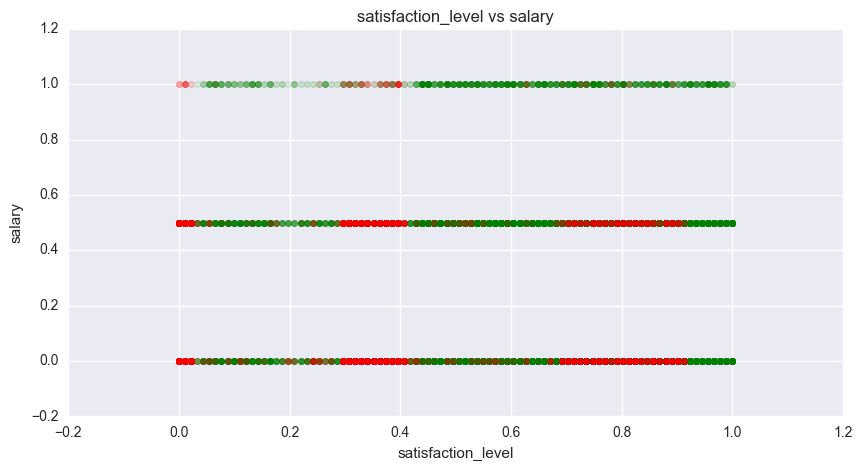

In [22]:
# plot of Satisfaction vs Last Evaluation
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_scaled.satisfaction_level[stayed], X_scaled.salary_variable[stayed], alpha=0.1, color='g')
ax.scatter(X_scaled.satisfaction_level[left], X_scaled.salary_variable[left], alpha=0.1, color='r')
ax.set_title("satisfaction_level vs salary")
ax.set_xlabel("satisfaction_level")
ax.set_ylabel("salary")
plt.show()

In the Satisfaction vs Last Evaluation plot below, we can note some interesting observations. Firstly, there is a sizeable cluster of people with strong evaluations and low satisfaction levels leaving. Secondly, there is a significant group of people leaving that are slighly below average in performance and evaluation. Lastly, and by far the most interesting observation of the three, there is a decent size of a not very dense cluster of people leaving that have done extremely well on their evaluations (0.7 to 1 on a 0-1 scale) and and have very high satisfaction rates, albeit not perfect (0.7-0.9 on a 0-1 scale). That particular group of employees also have many people that stay, but a significant proportion of that group is leaving. So the most surprising thing to observe is that people can be satisfied with the job and still leave! There are several possibilites for why this might be possible. People might enjoy their job but think they can do even better elsewhere, whether its income or career growth (or a combination of the two, considering that those things tend to go hand in hand). Another possibility is that people might not be honest in surveys because of fear of being reprimanded for negative surveys.

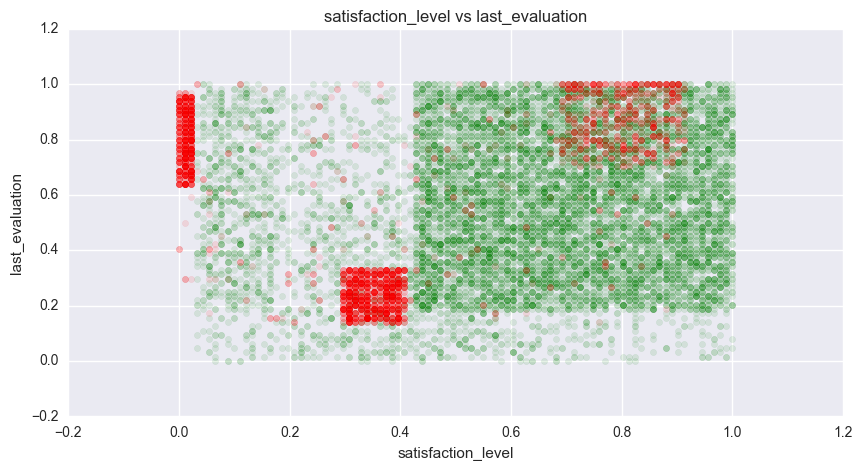

In [23]:
# plot of Satisfaction vs Last Evaluation
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_scaled.satisfaction_level[stayed], X_scaled.last_evaluation[stayed], alpha=0.1, color='g')
ax.scatter(X_scaled.satisfaction_level[left], X_scaled.last_evaluation[left], alpha=0.1, color='r')
ax.set_title("satisfaction_level vs last_evaluation")
ax.set_xlabel("satisfaction_level")
ax.set_ylabel("last_evaluation")
plt.show()

The Satisfaction vs Promotion during the last five years plot below shows a very strong relationship in several interesting ways! People who have been promoted don't leave very often! However, such promotions are not common enough! Therefore, if you don't want good employees to leave, promoting them will really help!

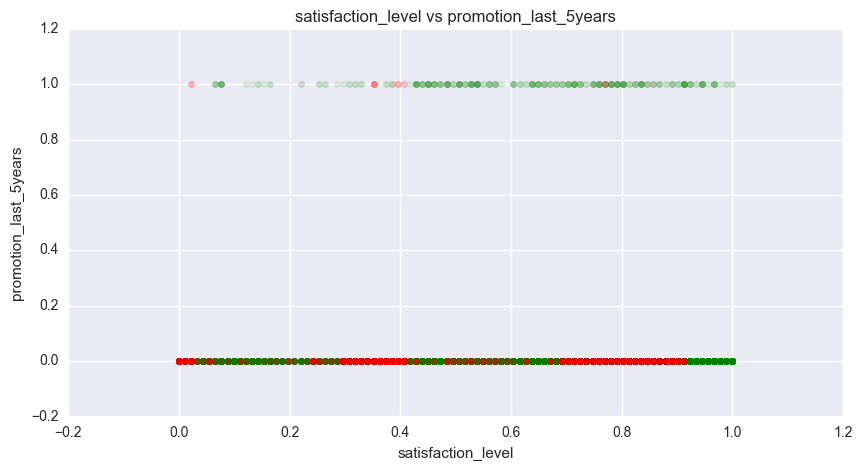

In [24]:
# plot of Satisfaction vs Promotion during last five years
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_scaled.satisfaction_level[stayed], X_scaled.promotion_last_5years[stayed], alpha=0.1, color='g')
ax.scatter(X_scaled.satisfaction_level[left], X_scaled.promotion_last_5years[left], alpha=0.1, color='r')
ax.set_title("satisfaction_level vs promotion_last_5years")
ax.set_xlabel("satisfaction_level")
ax.set_ylabel("promotion_last_5years")
plt.show()

The below scatter plot compares the average working hours against the time spent at the company and how it impacts the employee turnover rate. There are multiple interesting relationships to note. For employees that just started out, the majority tend to stick around for some time even if they work substantial hours. However, for employees who have been at the company for a while, there is a significant tendency to leave the company if working substantial hours. Consequently, we can observe that very few employees stick around at the company for a long time period because the ones who were working long hours almost all left! However, those that do stick around for a long time (relatively few) tend to all be devoted 
and not leave

There are several conjectures for why this is possible. One is that employees have worked for a significant amount of hours and put in a lot of time and effort expecting a quick promotion and/or pay increase (refer to graph above for relationship between promotions and staying/leaving) that they have not received and leave for elsewhere. Another reason might be that people have tried working for a little bit of time, realized that they are being overworked and have started looking for other opportunities to seek employment.

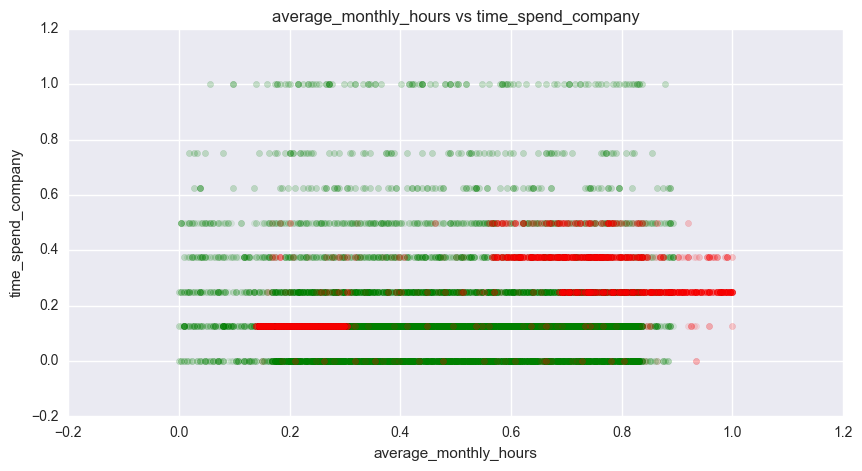

In [25]:
# plot of Average_monthly_hours vs time_spend_company
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_scaled.average_montly_hours[stayed], X_scaled.time_spend_company[stayed], alpha=0.1, color='g')
ax.scatter(X_scaled.average_montly_hours[left], X_scaled.time_spend_company[left], alpha=0.1, color='r')
ax.set_title("average_monthly_hours vs time_spend_company")
ax.set_xlabel("average_monthly_hours")
ax.set_ylabel("time_spend_company")
plt.show()

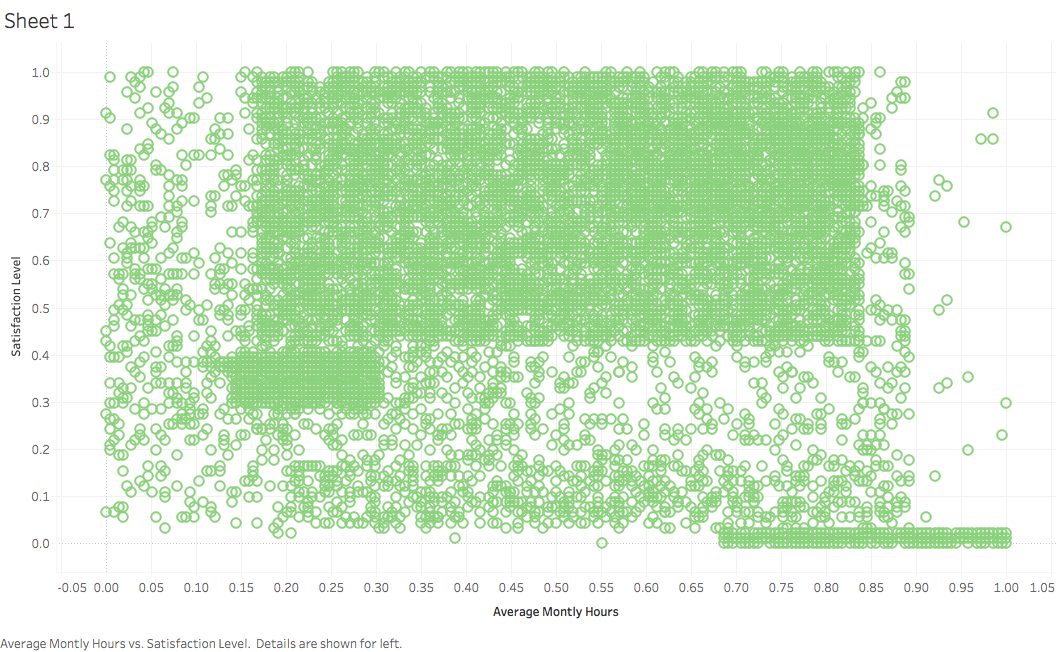

In [26]:
# Imported from Tableau
from IPython.display import Image
Image(filename = 'Average Monthly Hours vs Satisfaction Level.png', width = 1000)

There does not appear to be a strong relationship between accidents and people leaving the company, hence, people stay/leave regardless of the accidents they might have experienced.

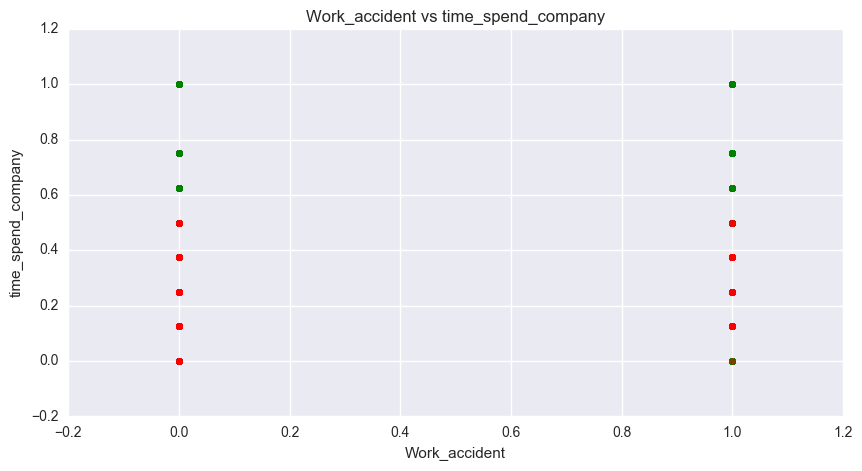

In [27]:
# plot of work_accident vs time_spend_company
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_scaled.Work_accident[stayed], X_scaled.time_spend_company[stayed], alpha=0.5, color='g')
ax.scatter(X_scaled.Work_accident[left], X_scaled.time_spend_company[left], alpha=0.5, color='r')
ax.set_title("Work_accident vs time_spend_company")
ax.set_xlabel("Work_accident")
ax.set_ylabel("time_spend_company")
plt.show()

The below stripplot compares number of projects done by an employee versus the number of promotions they have received over the past 5 years. It is interesting to note that the number of projects completed has very insignificant impact on whether a person leaves. On the contrary, the promotions received during the past 5 years is of critical importance. The majority of people who have received a promotion stay. Almost all those who were not promoted leave. 

The data seems insufficient to be able to determine why the number of projects is not related to promotions. There are at least several possibilities. Perhaps the number of projects refers to the number assigned (vs completed) or that the projects are not all of equal difficulty and not equally time consuming leading to distorted hypothesis that the number of projects might necessarily correspond to an employee's productivity. 

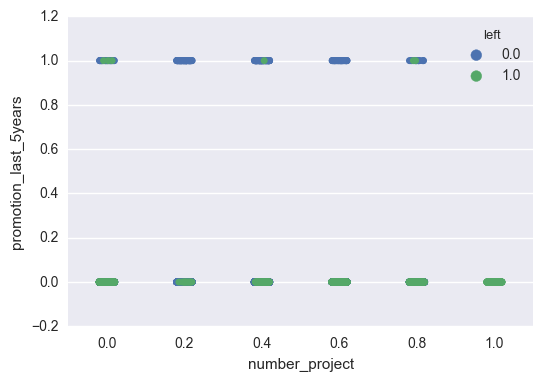

In [28]:
import seaborn as sns

sns.stripplot("number_project", "promotion_last_5years", data=X_scaled, hue="left", jitter = True)

The Satisfaction level distribution below shows that the majority of people are at least moderately satisfied with their job. Therefore, for the people that are satisfied and do well, efforts should be placed on making them even more happy by promoting them. For the people that do poorly or mediocre, either studies should be placed on determining why they are not doing well and trying to improve their performance or attempting to replace them with better employees (this would depend on a cost/benefit analysis) done by the company regarding this issue.

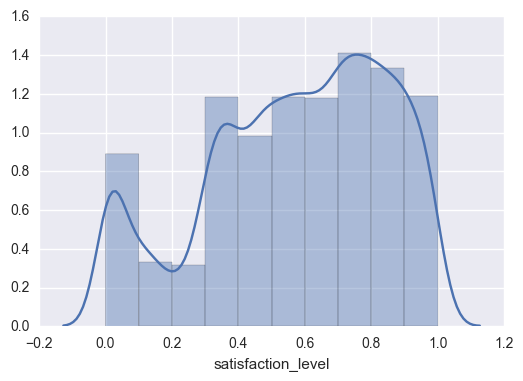

In [29]:
# Histogram distribution of Satisfaction Level

f,ax1 = plt.subplots(1,1)
sns.distplot(X_scaled['satisfaction_level'],bins=10,norm_hist=False)
plt.show()

The distribution (which is a decent approximation of a normal distribution with almost no tails and some kurtosis present) of the last evaluation graph shows us there is a sizeable portion of people that do well in their evaluations, hence the company should try to do as much as possible to keep those people!

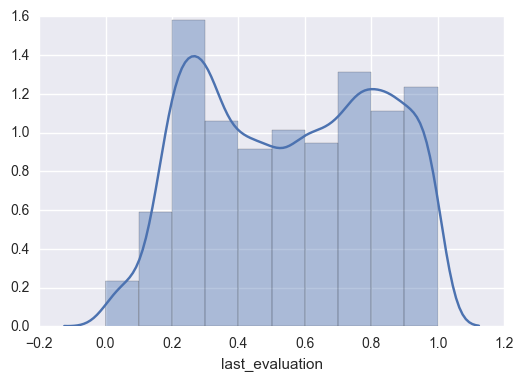

In [30]:
# Histogram distribution of Last Evaluation


f,ax1 = plt.subplots(1,1)
sns.distplot(X_scaled['last_evaluation'],bins=10,norm_hist=False)
plt.show()

The below plot shows the ratios of people who stay in the company by department and the 
ratio of people who leave the company by department.  It is clear from the chart that the departments with the most number of employees also have the highest ratios of both people who have left and those that stayed at the company. This tells us there should be particular effort place on retaining good employees that work in those departments, in particular the sales, technical and support departments, respectively. The largest efforts should be placed on retaining the good employees in these groups because they have the most people leaving.

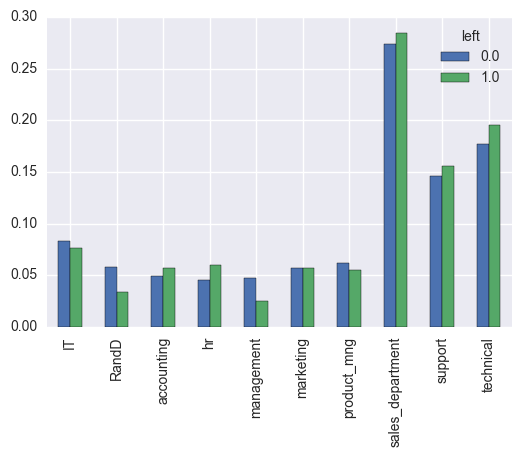

In [34]:
# This plot is to compare the people that left across different departments
# The non-department variables are deleted to only keep the departments

del X_scaled['satisfaction_level']
del X_scaled['last_evaluation']
del X_scaled['number_project']
del X_scaled['average_montly_hours']
del X_scaled['time_spend_company']
del X_scaled['Work_accident']
del X_scaled['promotion_last_5years']
del X_scaled['low']
del X_scaled['medium']
del X_scaled['high']
del X_scaled['salary_variable']


left=X_scaled.groupby('left').mean()
left=left.transpose()
plt.figure(figsize=(20,10))
left.plot(kind='bar')

# Part III

# Predictive Modelling

In this section below, multiple models will be run that are applicable to classification. Afterwards, various scoring metrics will be calculated for the models and a determination will be made as to which model is based for this dataset.

In [174]:
# read in the data & create matrices
X = X_scaled[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", \
              "time_spend_company", "Work_accident", "promotion_last_5years", "salary_variable",\
              "technical", "support", "IT", "product_mng", "marketing", "RandD", "accounting",\
              "hr", "management", "sales_department"]]
y = X_scaled["left"]

In [175]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

# Logistic Regression Model

In [33]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
mdl = model.fit(X_train, y_train)

# predict the response for new observations

logit = model.predict(X_test)

# sklearn output to check that ran on right data split.

len(logit)

3750

In [34]:
# These represent the y-intercept and coefficients for all the variables in the logistic regression.

print(model.intercept_)
print(model.coef_)

[ 0.57305398]
[[-3.71487625  0.45484967 -1.50619896  0.8704181   1.97590531 -1.45425383
  -1.26024249 -1.32512177  0.22588571  0.23497924 -0.01282827  0.07509077
   0.13925062 -0.47542127  0.26606552  0.3920348  -0.44451555  0.17251241]]


In [35]:
# Prediction Accuracy for Logistic Regression

from sklearn import metrics
print(metrics.accuracy_score(y_test, logit))

0.796


In [36]:
from sklearn.cross_validation import cross_val_score

In [37]:
# 10-fold cross-validation for Logistic Regression to find the CV score
mdl = model.fit(X_train, y_train)
scores = cross_val_score(mdl, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())

0.794205514996


In [38]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, logit)
print ((confusion))

[[2651  211]
 [ 554  334]]


In [39]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

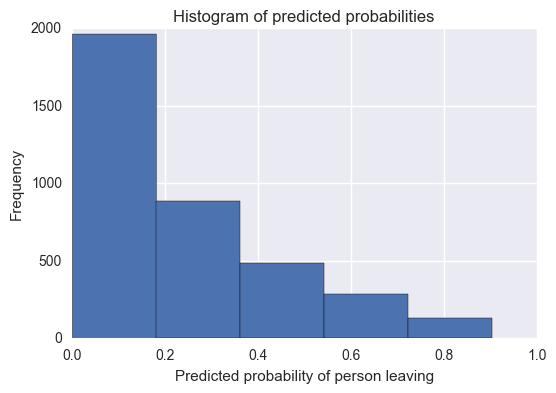

In [40]:
# histogram of predicted probabilities of people leaving the company 
plt.hist(y_pred_prob, bins=5)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of person leaving')
plt.ylabel('Frequency')

In [41]:
import matplotlib.patheffects as path_effects
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['Left', 'Stayed']):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True', fontsize = 18)
    plt.xlabel('Predicted', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])
    return

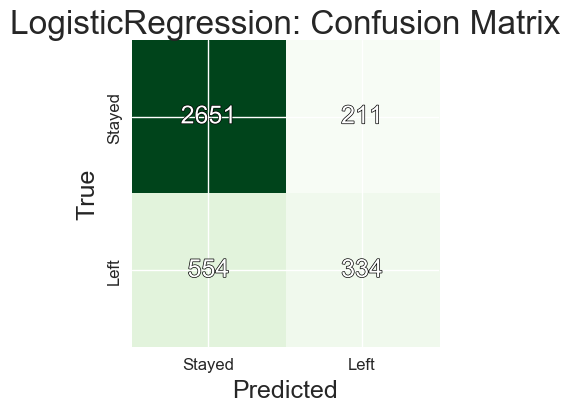

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, logit)


plot_confusion_matrix(cm, title='LogisticRegression: Confusion Matrix', \
                      labels=['Stayed', 'Left'], cmap=plt.cm.Greens) 


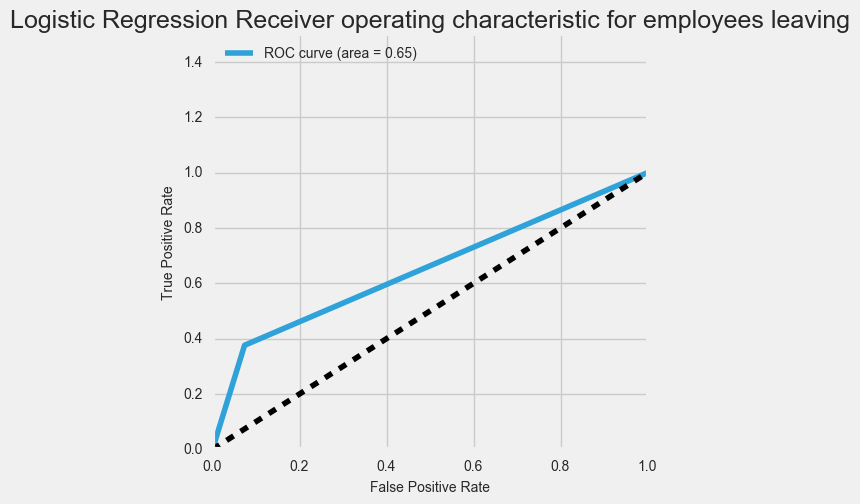

In [43]:
# Roc_curve for Logistic Regression Model


from sklearn.metrics import roc_curve, auc
plt.style.use('fivethirtyeight')

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, logit)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (employee left)
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Logistic Regression Receiver operating characteristic for employees leaving', fontsize=18)
plt.legend(loc="upper left")
plt.show()

# K Nearest Nearbours Model

# K=1

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# K-Nearest Neighbours with K=1
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

In [46]:
y = knn.fit(X_train, y_train)

KNN = knn.predict(X_test)

# sklearn output to check that ran on right data split.

len(KNN)

3750

In [47]:
# Cross fold validation for K=1

md2 = knn.fit(X_train, y_train)
scores = cross_val_score(md2, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())

0.962043001151


In [48]:
# Prediction Accuracy.

from sklearn import metrics
print(metrics.accuracy_score(y_test, KNN))

0.967466666667


In [49]:
confusion = metrics.confusion_matrix(y_test, KNN)
print confusion

[[2775   87]
 [  35  853]]


In [50]:
# Classification Accuracy confirmation between manual calculation and formula for K=1

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, KNN))

0.967466666667
0.967466666667


In [51]:
# Misclassification Accuracy confirmation between manual calculation and formula for K=1
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, KNN))

0.0325333333333
0.0325333333333


In [52]:
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
# This is calculated for K=1

print(TP / float(TP + FN))
print(metrics.recall_score(y_test, KNN))

0.960585585586
0.960585585586


In [53]:
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for K=1


print(TN / float(TN + FP))

0.969601677149


In [54]:
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for K=1

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, KNN))

0.907446808511
0.907446808511


In [55]:
# Misclassification Accuracy confirmation between manual calculation and formula for K=1
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, KNN))

0.0325333333333
0.0325333333333


In [56]:
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

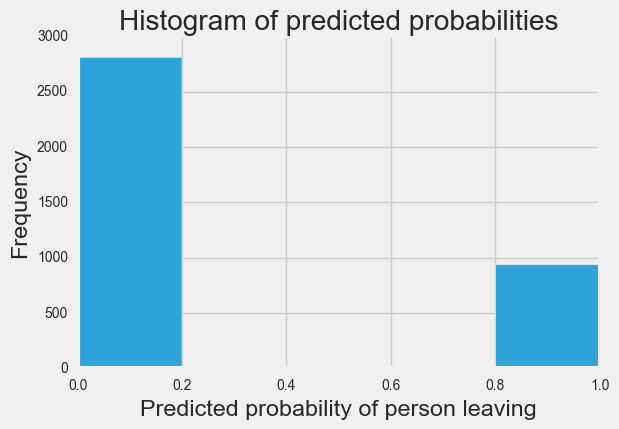

In [57]:
# histogram of predicted probabilities of people leaving the company 
plt.hist(y_pred_prob_knn, bins=5)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of person leaving')
plt.ylabel('Frequency')

In [58]:
import matplotlib.patheffects as path_effects
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['Left', 'Stayed']):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True', fontsize = 18)
    plt.xlabel('Predicted', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])
    return

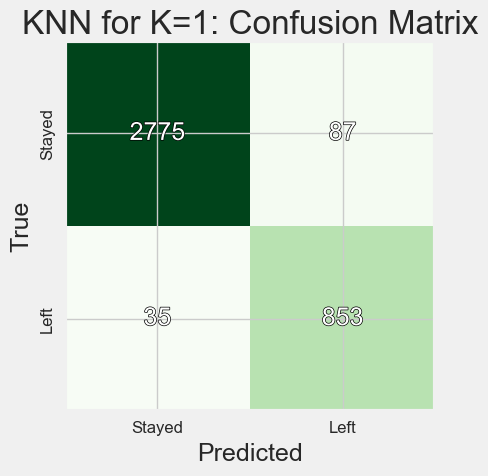

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, KNN)


plot_confusion_matrix(cm, title='KNN for K=1: Confusion Matrix', \
                      labels=['Stayed', 'Left'], cmap=plt.cm.Greens) 

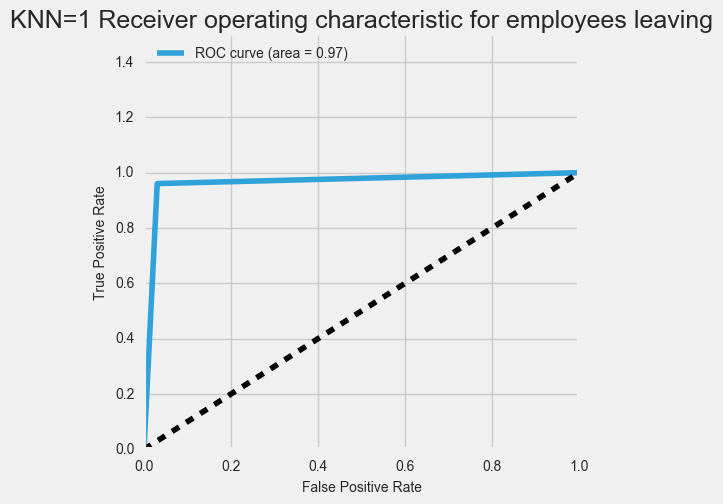

In [60]:
# Roc_curve for KNN=1 Model


from sklearn.metrics import roc_curve, auc
plt.style.use('fivethirtyeight')

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, KNN)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (employee left)
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('KNN=1 Receiver operating characteristic for employees leaving', fontsize=18)
plt.legend(loc="upper left")
plt.show()

# K=5

In [61]:
# K-Nearest Neighbours with K=5

knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
y = knn.fit(X_train, y_train)
KNN5 = knn.predict(X_test)

# sklearn output to check that ran on right data split.

len(KNN5)



3750

In [62]:
# Cross Validation for K=5 Cross-Fold Validation

md2 = knn.fit(X_train, y_train)
scores = cross_val_score(md2, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())

0.938309179837


In [63]:
# Prediction Accuracy on KNN=5 for accuracy score

from sklearn import metrics
print(metrics.accuracy_score(y_test, KNN5))

0.941333333333


In [64]:
confusion = metrics.confusion_matrix(y_test, KNN5)
print confusion

[[2731  131]
 [  89  799]]


In [65]:
# Classification Accuracy confirmation between manual calculation and formula for K=5

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, KNN5))

0.941333333333
0.941333333333


In [66]:
# Misclassification Accuracy confirmation between manual calculation and formula for K=5
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, KNN5))

0.0586666666667
0.0586666666667


In [67]:
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
# This is calculated for K=5

print(TP / float(TP + FN))
print(metrics.recall_score(y_test, KNN5))

0.899774774775
0.899774774775


In [68]:
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for K=5

print(TN / float(TN + FP))

0.954227812718


In [69]:
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for K=5

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, KNN5))

0.859139784946
0.859139784946


In [70]:
# Misclassification Accuracy confirmation between manual calculation and formula for K=5
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, KNN5))

0.0586666666667
0.0586666666667


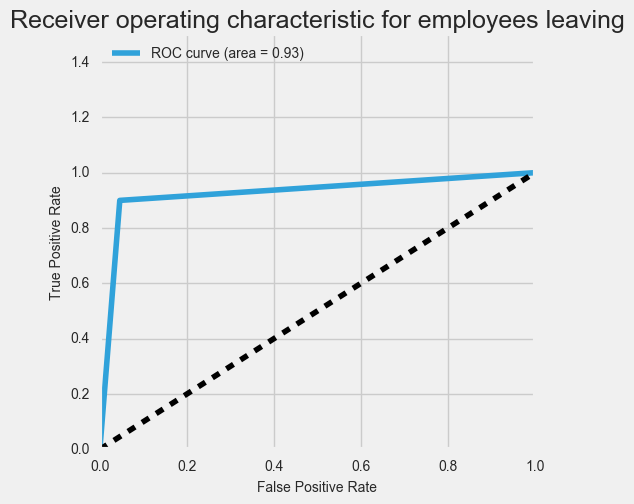

In [71]:
# Roc_curve for KNN=5 Model


from sklearn.metrics import roc_curve, auc
plt.style.use('fivethirtyeight')

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, KNN5)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (employee left)
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver operating characteristic for employees leaving', fontsize=18)
plt.legend(loc="upper left")
plt.show()

In [72]:
import matplotlib.patheffects as path_effects
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['Left', 'Stayed']):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True', fontsize = 18)
    plt.xlabel('Predicted', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])
    return

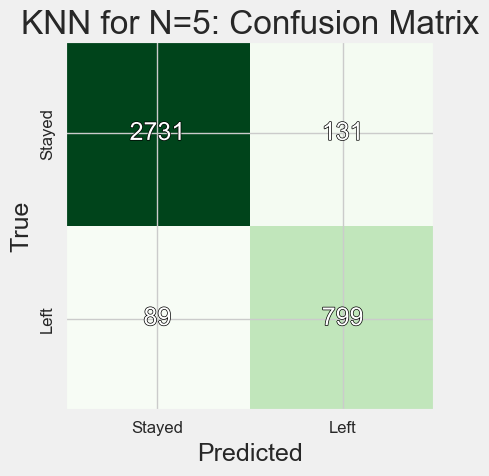

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, KNN5)


plot_confusion_matrix(cm, title='KNN for N=5: Confusion Matrix', \
                      labels=['Stayed', 'Left'], cmap=plt.cm.Greens)

In [74]:
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

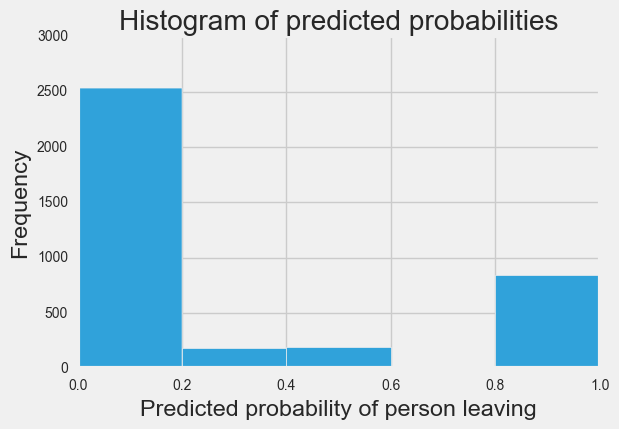

In [75]:
# histogram of predicted probabilities of people leaving the company 
plt.hist(y_pred_prob_knn, bins=5)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of person leaving')
plt.ylabel('Frequency')

Grid Search for optimal N value in KNN

In [101]:
from sklearn.grid_search import GridSearchCV

/Users/Misha/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [102]:

k_potentials = list(range(1, 200))
print(k_potentials)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


In [103]:
# Set Nearest Neighbours equal to k
knn = KNeighborsClassifier(n_neighbors=k_potentials, metric = 'euclidean')
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_potentials)
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid.fit(X_train, y_train)
# view the results
grid.grid_scores_



[mean: 0.96240, std: 0.00591, params: {'n_neighbors': 1},
 mean: 0.95884, std: 0.00543, params: {'n_neighbors': 2},
 mean: 0.94568, std: 0.00463, params: {'n_neighbors': 3},
 mean: 0.94622, std: 0.00555, params: {'n_neighbors': 4},
 mean: 0.93875, std: 0.00620, params: {'n_neighbors': 5},
 mean: 0.94284, std: 0.00673, params: {'n_neighbors': 6},
 mean: 0.93795, std: 0.00746, params: {'n_neighbors': 7},
 mean: 0.93839, std: 0.00819, params: {'n_neighbors': 8},
 mean: 0.93351, std: 0.00932, params: {'n_neighbors': 9},
 mean: 0.93493, std: 0.00848, params: {'n_neighbors': 10},
 mean: 0.93048, std: 0.00825, params: {'n_neighbors': 11},
 mean: 0.93253, std: 0.00810, params: {'n_neighbors': 12},
 mean: 0.92933, std: 0.00898, params: {'n_neighbors': 13},
 mean: 0.92968, std: 0.00824, params: {'n_neighbors': 14},
 mean: 0.92719, std: 0.00747, params: {'n_neighbors': 15},
 mean: 0.92817, std: 0.00830, params: {'n_neighbors': 16},
 mean: 0.92559, std: 0.00873, params: {'n_neighbors': 17},
 mean:

In [104]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.9623966574806649, 0.9588407858476309, 0.9456840608054049, 0.94621744155036, 0.9387501111209885, 0.9428393634989777, 0.9379500400035559, 0.9383945239576851, 0.9335052004622633, 0.9349275491154769, 0.9304827095741843, 0.9325273357631789, 0.9293270512934483, 0.9296826384567517, 0.9271935283136279, 0.9281713930127122, 0.9255933860787625, 0.9272824251044537, 0.9249711085429816, 0.9247044181705041, 0.9220375144457285, 0.9218597208640769, 0.9190150235576495, 0.9177704684860877, 0.9156369455062672, 0.914570184016357, 0.9124366610365365, 0.9124366610365365, 0.911014312383323, 0.9111032091741488, 0.9090585829851542, 0.9094141701484576, 0.9077251311227664, 0.9072806471686372, 0.9055027113521202, 0.9041692594897324, 0.9029247044181705, 0.9009689750200017, 0.9003466974842208, 0.8987465552493555, 0.8975908969686194, 0.8962574451062316, 0.8953684771979732, 0.8927015734731976, 0.8917237087741132, 0.8895012890034669, 0.8890568050493377, 0.8866565916970397, 0.8857676237887813, 0.8852342430438261, 0.8

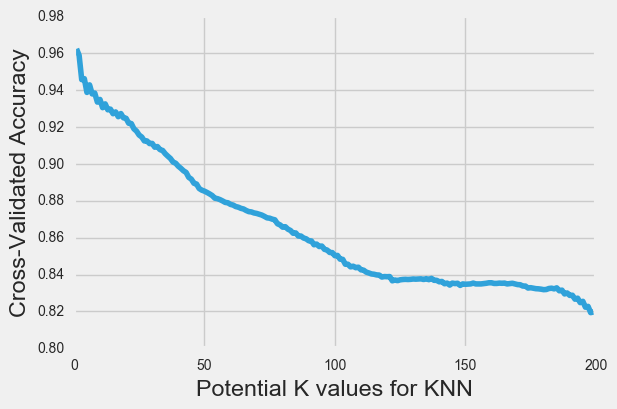

In [105]:

# plot the results (Manhattan distance)
plt.plot(k_potentials, grid_mean_scores)
plt.xlabel('Potential K values for KNN')
plt.ylabel('Cross-Validated Accuracy')

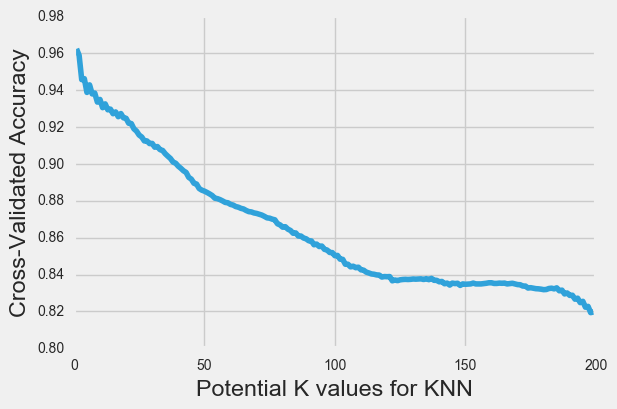

In [106]:
# plot the results (using Euclidean distance)
plt.plot(k_potentials, grid_mean_scores)
plt.xlabel('Potential K values for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [107]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.962396657481
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [108]:
# read in the data & create matrices
X = X_scaled[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", \
              "time_spend_company", "Work_accident", "promotion_last_5years", "low", "medium",\
              "technical", "support", "IT", "product_mng", "marketing", "RandD", "accounting",\
              "hr"]]
y = X_scaled["left"]

In [176]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

# Support Vector Machines

In [177]:
# Train, fit and predict with SVM

from sklearn import svm
Model=svm.SVC(kernel='linear')
Model.fit(X_train,y_train)
Y_pred=Model.predict(X_test)

In [178]:
# Cross validation score for SVM
scores = cross_val_score(Model, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())

0.780694712068


In [179]:
# Evaluate SVM for accuracy

from sklearn import metrics
metrics.accuracy_score(y_test,Y_pred)

0.78106666666666669

In [180]:
# Confusion matrix for SVM

confusion = metrics.confusion_matrix(y_test, Y_pred)
print confusion

[[2696  166]
 [ 655  233]]


In [181]:
# Classification Accuracy confirmation between manual calculation and formula for SVM

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, Y_pred))

0.781066666667
0.781066666667


In [182]:
# Misclassification Accuracy confirmation between manual calculation and formula for SVM
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, Y_pred))

0.218933333333
0.218933333333


In [183]:
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
# This is calculated SVM

print(TP / float(TP + FN))
print(metrics.recall_score(y_test, Y_pred))

0.262387387387
0.262387387387


In [184]:
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for SVM

print(TN / float(TN + FP))

0.941998602376


In [185]:
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for SVM

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, Y_pred))

0.583959899749
0.583959899749


In [186]:
# Misclassification Accuracy confirmation between manual calculation and formula for SVM
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, Y_pred))

0.218933333333
0.218933333333


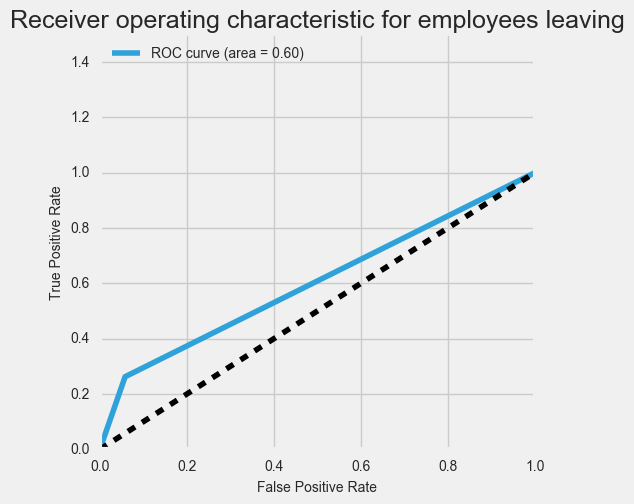

In [187]:
# Roc_curve for Support Vector Machine Model


from sklearn.metrics import roc_curve, auc
plt.style.use('fivethirtyeight')

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_pred)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (employee left)
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver operating characteristic for employees leaving', fontsize=18)
plt.legend(loc="upper left")
plt.show()

In [92]:
import matplotlib.patheffects as path_effects
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['Left', 'Stayed']):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True', fontsize = 18)
    plt.xlabel('Predicted', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])
    return

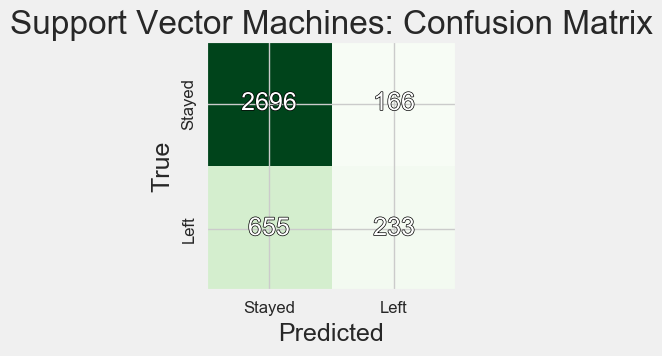

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)


plot_confusion_matrix(cm, title='Support Vector Machines: Confusion Matrix', \
                      labels=['Stayed', 'Left'], cmap=plt.cm.Greens)

# Random Forest

In [157]:
# Random Forests Classifier from Scikit Learn

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_jobs=2)
RF.fit(X_train,y_train)
Y_pred=RF.predict(X_test)

In [158]:
# Score for 10-fold Cross Validation for Random Forests Classifier

scores = cross_val_score(RF, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())

0.986309602501


In [159]:
# Prediction Accuracy for Random Forests

from sklearn import metrics
print(metrics.accuracy_score(y_test, Y_pred))

0.9896


In [160]:
# Confusion matrix for Random Forests

confusion = metrics.confusion_matrix(y_test, Y_pred)
print confusion

[[2857    5]
 [  34  854]]


In [161]:
# Classification Accuracy confirmation between manual calculation and formula for Random Forest

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, Y_pred))

0.9896
0.9896


In [162]:
# Misclassification Accuracy confirmation between manual calculation and formula for Random Forest
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, Y_pred))

0.0104
0.0104


In [163]:
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
# This is calculated for Random Forest Classifier

print(TP / float(TP + FN))
print(metrics.recall_score(y_test, Y_pred))

0.961711711712
0.961711711712


In [164]:
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for Random Forest Classifier

print(TN / float(TN + FP))

0.998252969951


In [165]:
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for Random Forest Classifier.

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, Y_pred))

0.994179278231
0.994179278231


In [166]:
# Misclassification Accuracy confirmation between manual calculation and formula for Random Forest
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, Y_pred))

0.0104
0.0104


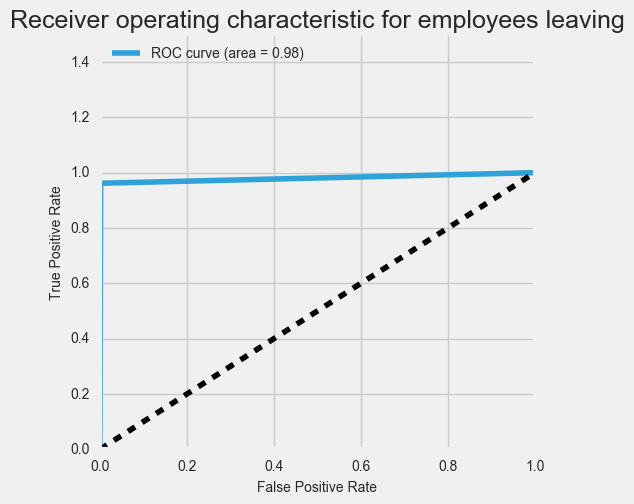

In [167]:
# Roc_curve for Random Forest Model


from sklearn.metrics import roc_curve, auc
plt.style.use('fivethirtyeight')

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_pred)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (employee left)
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver operating characteristic for employees leaving', fontsize=18)
plt.legend(loc="upper left")
plt.show()

In [168]:
y_pred_prob_Random_Forest = RF.predict_proba(X_test)[:, 1]

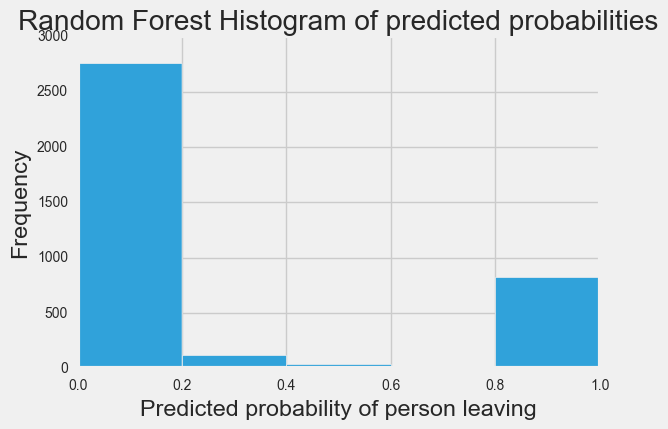

In [172]:
# histogram of predicted probabilities of people leaving the company 
plt.hist(y_pred_prob_Random_Forest, bins=5)
plt.xlim(0, 1)
plt.title('Random Forest Histogram of predicted probabilities')
plt.xlabel('Predicted probability of person leaving')
plt.ylabel('Frequency')

In [170]:
import matplotlib.patheffects as path_effects
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['Left', 'Stayed']):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True', fontsize = 18)
    plt.xlabel('Predicted', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])
    return

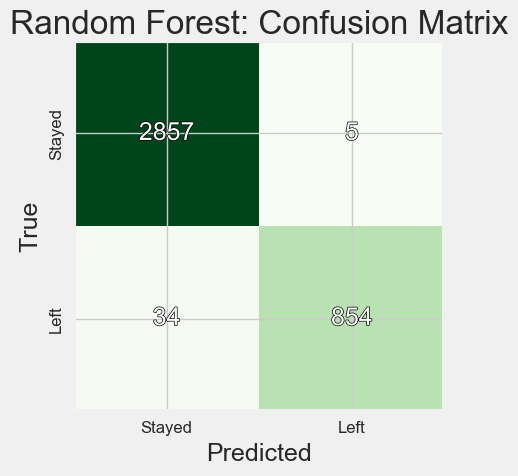

In [171]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)


plot_confusion_matrix(cm, title='Random Forest: Confusion Matrix', \
                      labels=['Stayed', 'Left'], cmap=plt.cm.Greens)

# Bagging 

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

In [110]:
# Bagging Classifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
Bagging = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
Bagging.fit(X_train,y_train)
Y_pred=Bagging.predict(X_test)


In [111]:
# Cross Validation for Bagging

scores = cross_val_score(Bagging, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())

0.987910076856


In [112]:
# Prediction Accuracy for Bagging

from sklearn import metrics
print(metrics.accuracy_score(y_test, Y_pred))

0.989333333333


In [113]:
# Confusion matrix for Bagging

confusion = metrics.confusion_matrix(y_test, Y_pred)
print confusion

[[2854    8]
 [  32  856]]


In [114]:
# Classification Accuracy confirmation between manual calculation and formula for Bagging

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, Y_pred))

0.989333333333
0.989333333333


In [115]:
# Misclassification Accuracy confirmation between manual calculation and formula for Bagging
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, Y_pred))

0.0106666666667
0.0106666666667


In [116]:
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
# This is calculated for Bagging Classifier

print(TP / float(TP + FN))
print(metrics.recall_score(y_test, Y_pred))

0.963963963964
0.963963963964


In [117]:
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for Bagging Classifier

print(TN / float(TN + FP))

0.997204751922


In [118]:
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for Bagging Classifier.

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, Y_pred))

0.990740740741
0.990740740741


In [119]:
# Misclassification Accuracy confirmation between manual calculation and formula for Bagging
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, Y_pred))

0.0106666666667
0.0106666666667


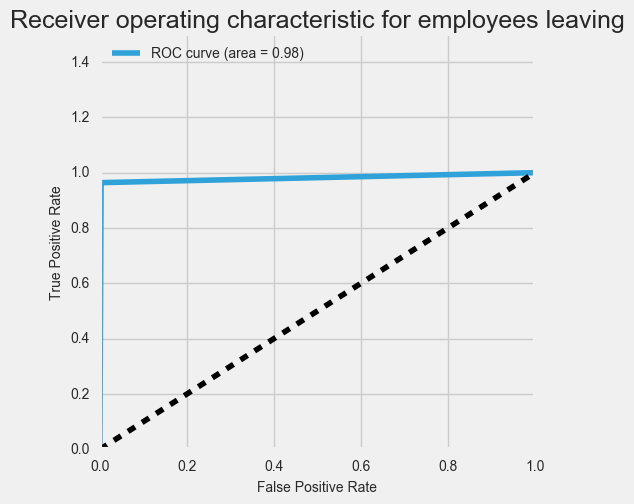

In [120]:
# Roc_curve for Bagging


from sklearn.metrics import roc_curve, auc
plt.style.use('fivethirtyeight')

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_pred)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (employee left)
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver operating characteristic for employees leaving', fontsize=18)
plt.legend(loc="upper left")
plt.show()

In [121]:
import matplotlib.patheffects as path_effects
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['Left', 'Stayed']):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True', fontsize = 18)
    plt.xlabel('Predicted', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])

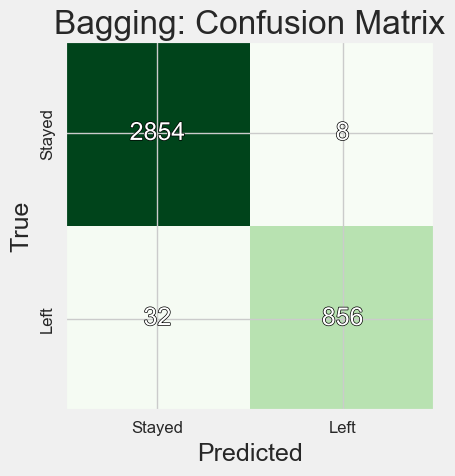

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)


plot_confusion_matrix(cm, title='Bagging: Confusion Matrix', \
                      labels=['Stayed', 'Left'], cmap=plt.cm.Greens)

In [123]:
y_pred_prob_Bagging = Bagging.predict_proba(X_test)[:, 1]

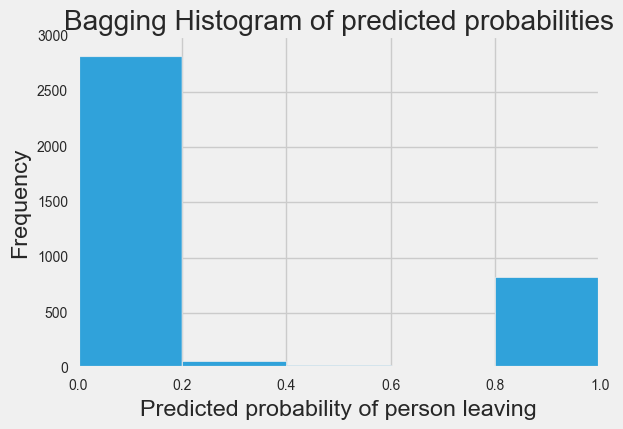

In [124]:
# histogram of predicted probabilities of people leaving the company 
plt.hist(y_pred_prob_Bagging, bins=5)
plt.xlim(0, 1)
plt.title('Bagging Histogram of predicted probabilities')
plt.xlabel('Predicted probability of person leaving')
plt.ylabel('Frequency')

# AdaBoost

In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [126]:
# AdaBoost Classifier

seed = 7
cart = AdaBoostClassifier()
num_trees = 100
AdaBoostClassifier = AdaBoostClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
AdaBoostClassifier.fit(X_train,y_train)
Y_pred=AdaBoostClassifier.predict(X_test)



In [127]:
# Cross Validation for AdaBoost

scores = cross_val_score(AdaBoostClassifier, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())

0.958576016468


In [128]:
# Prediction Accuracy for AdaBoost

from sklearn import metrics
print(metrics.accuracy_score(y_test, Y_pred))

0.958133333333


In [129]:
# Confusion matrix for AdaBoost

confusion = metrics.confusion_matrix(y_test, Y_pred)
print confusion

[[2793   69]
 [  88  800]]


In [130]:
# Classification Accuracy confirmation between manual calculation and formula for Bagging

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, Y_pred))

0.958133333333
0.958133333333


In [131]:
# Misclassification Accuracy confirmation between manual calculation and formula for AdaBoost
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, Y_pred))

0.0418666666667
0.0418666666667


In [132]:
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
# This is calculated for AdaBoost Boosting Classifier

print(TP / float(TP + FN))
print(metrics.recall_score(y_test, Y_pred))

0.900900900901
0.900900900901


In [133]:
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for AdaBoost Classifier

print(TN / float(TN + FP))

0.975890985325


In [134]:
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for AdaBoost Classifier.

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, Y_pred))

0.920598388953
0.920598388953


In [135]:
# Misclassification Accuracy confirmation between manual calculation and formula for AdaBoost
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, Y_pred))

0.0418666666667
0.0418666666667


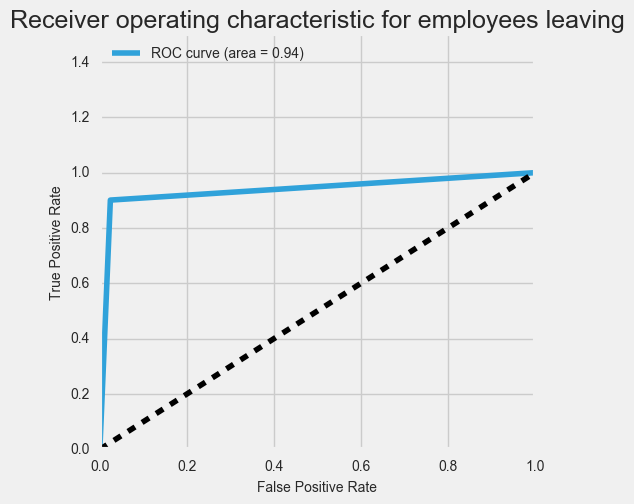

In [136]:
# Roc_curve for AdaBoost


from sklearn.metrics import roc_curve, auc
plt.style.use('fivethirtyeight')

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_pred)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (employee left)
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver operating characteristic for employees leaving', fontsize=18)
plt.legend(loc="upper left")
plt.show()

In [137]:
import matplotlib.patheffects as path_effects
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['Left', 'Stayed']):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True', fontsize = 18)
    plt.xlabel('Predicted', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])

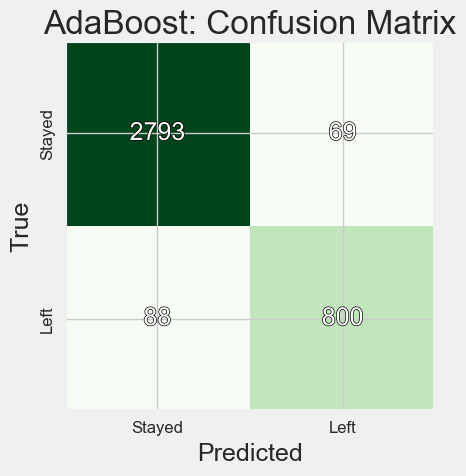

In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)


plot_confusion_matrix(cm, title='AdaBoost: Confusion Matrix', \
                      labels=['Stayed', 'Left'], cmap=plt.cm.Greens)

In [139]:
y_pred_prob_AdaBoost = AdaBoostClassifier.predict_proba(X_test)[:, 1]

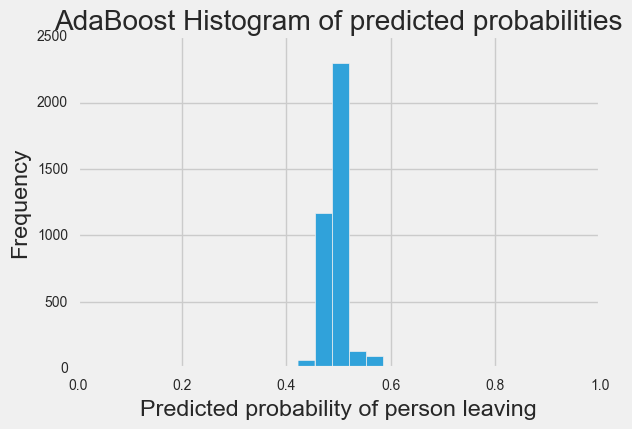

In [140]:
# histogram of predicted probabilities of people leaving the company 
plt.hist(y_pred_prob_AdaBoost, bins=5)
plt.xlim(0, 1)
plt.title('AdaBoost Histogram of predicted probabilities')
plt.xlabel('Predicted probability of person leaving')
plt.ylabel('Frequency')

# Gradient Boosting

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

In [142]:
# Train and predict Gradient Boosting

GradientBoosting = GradientBoostingClassifier()
GradientBoosting.fit(X_train,y_train)
Y_pred=GradientBoosting.predict(X_test)

In [143]:
# Cross Validation for Gradient Boosting

scores = cross_val_score(GradientBoosting, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())

0.976443246546


In [144]:
# Prediction Accuracy for Gradient Boosting

from sklearn import metrics
print(metrics.accuracy_score(y_test, Y_pred))

0.974133333333


In [145]:
# Confusion matrix for Gradient Boosting

confusion = metrics.confusion_matrix(y_test, Y_pred)
print confusion

[[2832   30]
 [  67  821]]


In [146]:
# Classification Accuracy confirmation between manual calculation and formula for Gradient Boosting

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, Y_pred))

0.974133333333
0.974133333333


In [147]:
# Misclassification Accuracy confirmation between manual calculation and formula for Gradient Boosting
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, Y_pred))

0.0258666666667
0.0258666666667


In [148]:
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
# This is calculated for Gradient Boosting Classifier

print(TP / float(TP + FN))
print(metrics.recall_score(y_test, Y_pred))

0.92454954955
0.92454954955


In [149]:
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for Gradient Classifier

print(TN / float(TN + FP))

0.989517819706


In [150]:
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for Gradient Boosting Classifier.

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, Y_pred))

0.964747356052
0.964747356052


In [151]:
# Misclassification Accuracy confirmation between manual calculation and formula for Gradient Boosting
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, Y_pred))

0.0258666666667
0.0258666666667


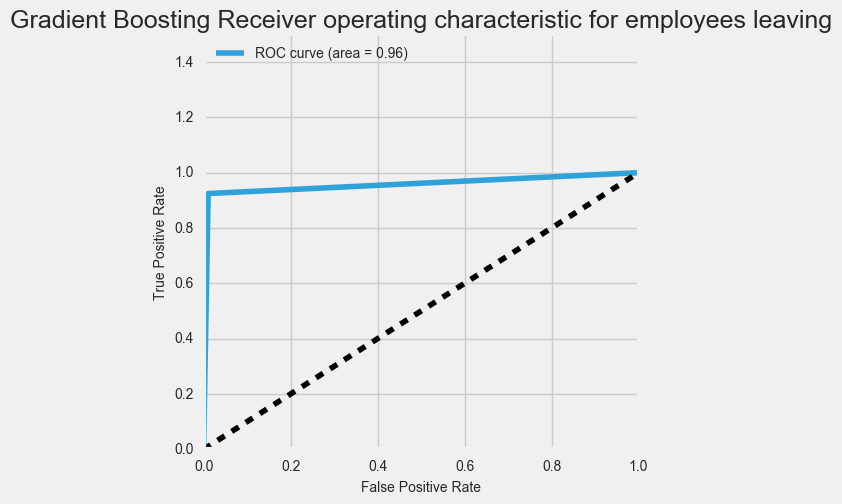

In [152]:
# Roc_curve for Gradient Boosting


from sklearn.metrics import roc_curve, auc
plt.style.use('fivethirtyeight')

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_pred)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (employee left)
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Gradient Boosting Receiver operating characteristic for employees leaving', fontsize=18)
plt.legend(loc="upper left")
plt.show()

In [153]:
import matplotlib.patheffects as path_effects
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['Left', 'Stayed']):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True', fontsize = 18)
    plt.xlabel('Predicted', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])

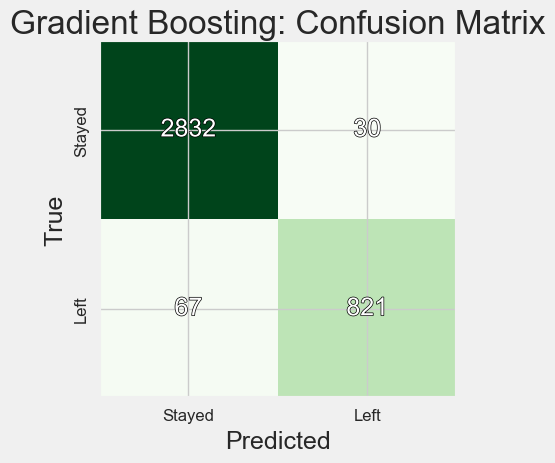

In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)


plot_confusion_matrix(cm, title='Gradient Boosting: Confusion Matrix', \
                      labels=['Stayed', 'Left'], cmap=plt.cm.Greens)

In [155]:
y_pred_prob_GradientBoosting = GradientBoosting.predict_proba(X_test)[:, 1]

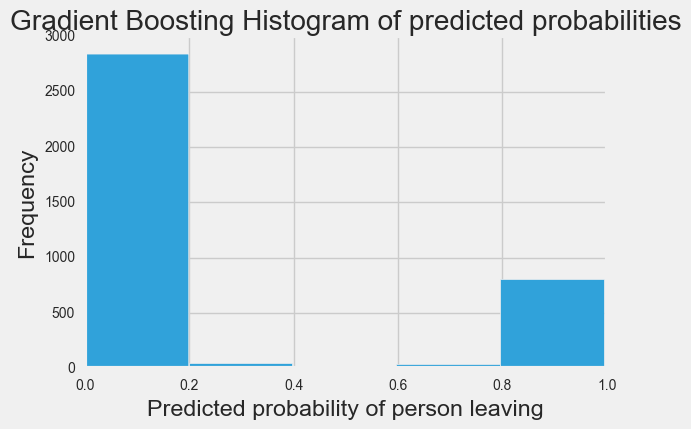

In [156]:
# histogram of predicted probabilities of people leaving the company 
plt.hist(y_pred_prob_GradientBoosting, bins=5)
plt.xlim(0, 1)
plt.title('Gradient Boosting Histogram of predicted probabilities')
plt.xlabel('Predicted probability of person leaving')
plt.ylabel('Frequency')

# Part IV

# Conclusion

One interesting chart showed us which departments have the most people leaving (and staying). They are Sales followed by Technical and Support. That means that the biggest effort at the company should be placed on keeping the strong employees in those departments (but by no means neglect the other departments).

There are several other interesting patterns in the data. Some are very intuitive whereas others very surprising and unexpected. There are three clusters of people leaving the company (the most important cluster is not as dense, in the sense that there are actually slightly more people there that stay than leave, but nevertheless its the most interesting and surprising cluster).

The three groups are employees with high performance and low satisfaction, employees with low satisfcation and performance (rather obvious) and employees with high satisfaction and performance (a surprising result). The first two results are very strong but rather trivial, there is limited use in providing detailed analyses of them. However, the somewhat less dense but very significant group of highly satisfied employees that do remarkably well in their evaluations is of extreme importance. Why do they leave? Well, there are several important factors to consider. 

The people with high salaries and at even average satisfaction levels rarely leave the firm. Hence, one attribute that people who tend to leave will generally possess is salaries that are not high and fall in the low or medium range. It is interesting to note though that people with near perfect to perfect satisfaction levels do not leave even if they are in the low or medium income range brackets. Hence, a possible course of action to potentially alleviate this issue is increase salaries for good employees. Also, a further investigation into what might be the differentiating factor between people who are very satisfied (0.7-0.9 rate) vs super satisfied (0.9-1.0) can be done to see if it is possible to further increase the satisfaction level of those that are very satisfied but not perfectly so (maybe its possible to do this while at the same time saving money by not instituting as much pay increases if there is a way to get them satisfied in another manner, perhaps by working less hours for instance) would be a good idea.

Secondly, promotions are a huge factor. Looking at the plot of promotions during the past five years, it is very clear that people who are promoted stay and people who are not promoted leave. Of course, promotions and salary increases have some correlation because people tend to receive salary increases during promotions. Hence, it's important to promote employees if they do good work! That will help decrease the turnover rate.

The third important point is that employees who work a lot of hours that stay at the company for at least a medium amount of time tend to leave. Only the relatively small number of employees who work at the company for many years stay at the company regardless of working hours but very few make it there. Hence, the hours worked plays an important decision making role when employees think about whether to stay at the firm or seek other employment. Due to this finding it is important to see if any kind of rebalancing can be done so that part of the work can perhaps be shifted between employees who do not work as many hours and those that do in order to make the distribution of hours worked by employees more uniform which can perhaps increase employees willingness to stay at the company longer. It is quiet possible that some employees just feel burnt out even if they are generally happy with their job. Due to an inefficient work life balance, they might seek to find employment elsewhere.



Multiple machine learning algorithms were ran on the data and quiet a few did relatively well
in terms of making predictions on out of sample data as measured by the accuracy score, the
confusion matrix and deriatives thereof as well as the ROC Curve. In particular, the Random Forest and Bagging algorithms did the best with accuracy and cross-validation scores marginally different from each other just under 99%. Both correctly predicted over 3,700 out of 3,750 employees accurately (compared to a baseline accuracy of only 76% (2,850) as to whether they would leave/stay). The various scores computed from the confusion matrix were all almost perfect. Particularly importantly, the ROC curve has an area covering of .98 for both those algorithms.

Hence, using either of these two algorithms (Random Forests or Bagging) have given us great
predictions as to which employees will leave vs which ones would stay. 
                                                

# Assumptions

We have assumed the dataset is accurate as we have not audited its validity.

Another assumption we made is that we trained on 75% of the data, conducted cross-validation, 
and then tested on the 25% remaining out of sample. However, when trying to sample to train a 
larger sample of the data (such as 90/10 test/train split), we received very similar results in our algorithms. Hence, our model is robust as should perform well when used on future data.
 
An assumption made by the Random Forest Model which did exceptionally well is that the sampling that it conducted during boostrap aggregation is actually representative. This is a safe assumption to make and the model has done really well on out of sample data.
